# Plant Statistics

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Column names

In [46]:
columns = [
    'Day/ Treatment',
    '0,0', '0,3', '0,6', '0,9',
    '0.25,0', '0.25,3', '0.25,6', '0.25,9',
    '0.5,0', '0.5,3', '0.5,6', '0.5,9',
    '0.75,0', '0.75,3', '0.75,6', '0.75,9'
]

In [47]:
def actual_number(val):
    return val != ' ' and \
        val != ',' and \
        val != ', '

In [48]:
def convert_to_df(spreadsheet):
    with open(spreadsheet) as csvfile:
        plant_reader = csv.reader(csvfile)
        scallion_data = [[[height
                           for height in treatment.split(',')
                           if actual_number(height)]
                          for treatment in day
                          if actual_number(day)]
                         for day in plant_reader]
        return pd.DataFrame(scallion_data[1:], columns=columns)

In [49]:
def convert_to_np(scallion_data, treatment):
    scallion_X = np.array([2 * int(x[0])
                           for x in scallion_data['Day/ Treatment']
                           for _ in range(5)])
    
    scallion_y = np.array([[float(y)
                            for y in row]
                           for row in scallion_data[treatment]])
    scallion_y = np.reshape(scallion_y, -1)

    return scallion_X, scallion_y

In [50]:
def linear_model(X, y):
    """Builds a linear model and returns a statsmodels object"""
    results = sm.OLS(y, sm.add_constant(X)).fit()
    return results


def resids(X, y, model):
    """Returns a numpy array contatining residuals"""
    return np.array([y_coord - (X[index] * model.params[1] + model.params[0])
                     for index, y_coord in enumerate(y)])

In [51]:
def plot_data(scallion_X, scallion_y, treatment, plant_type):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Data')

    results = linear_model(scallion_X, scallion_y)
    X_plot = np.linspace(0, 12, 100)
    plt.plot(X_plot, X_plot * results.params[1] + results.params[0], label='line of best fit')

    plt.xlabel('Time (days)')
    plt.ylabel('Height (cm)')
    plt.title("{} {} Growth Rate".format(treatment, plant_type))
    plt.legend()

    plt.scatter(scallion_X, scallion_y, color='k', s=25, marker='o', label='plant heights')
    plt.show()

In [52]:
def plot_resids(X, y, treatment, plant_type):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Residuals')

    y = resids(X, y, linear_model(X, y))
    plt.xlabel('Time (days)')
    plt.ylabel('Residuals (cm)')
    plt.title("{} {} Growth Rate Residuals".format(treatment, plant_type))
    plt.legend()

    plt.scatter(X, y, color='k', s=25, marker='o', label='residuals')
    plt.show()

In [53]:
def plot(X, y, treatment, plant_type):
    plot_data(X, y, treatment, plant_type)
    plot_resids(X, y, treatment, plant_type)

In [54]:
def lin_reg_from_csv(spreadsheet, plant_type):
    data = convert_to_df(spreadsheet)
    
    for treatment in columns[1:]:
        X, y = convert_to_np(data, treatment)
        plot(X, y, treatment, plant_type)

## Scallion Linear Regression
Growth rates for the scallion data are plotted below along with residuals.

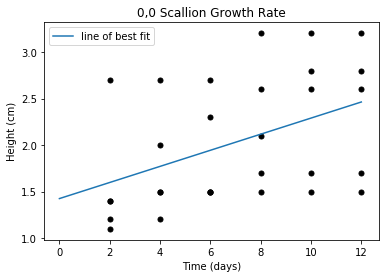

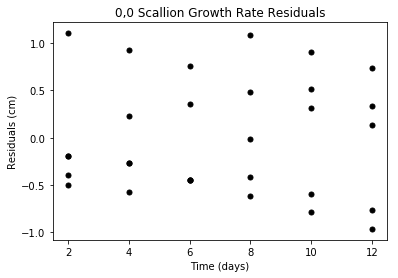

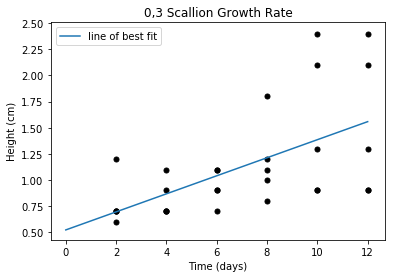

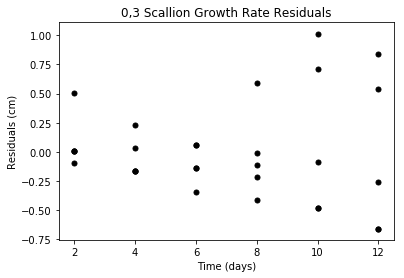

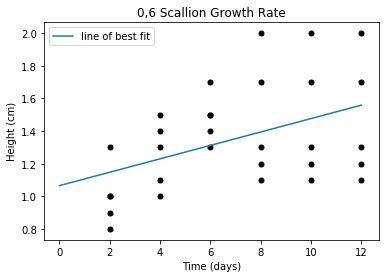

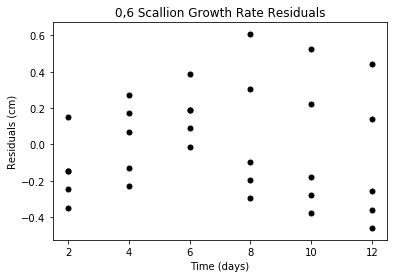

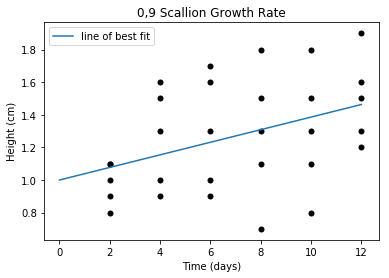

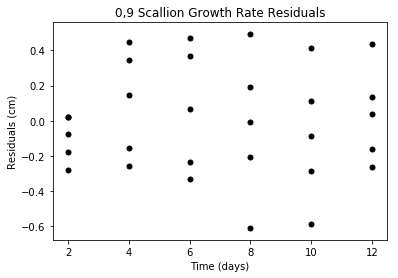

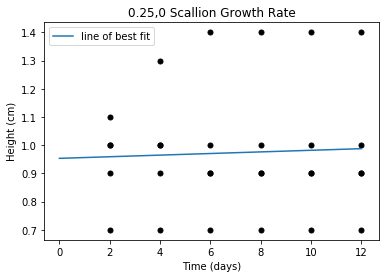

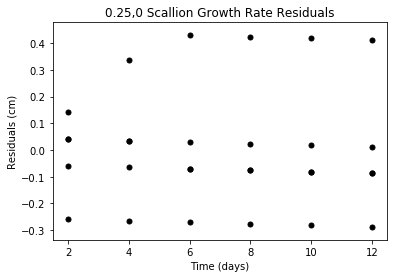

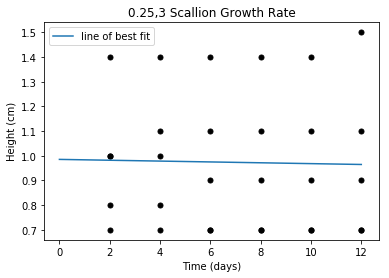

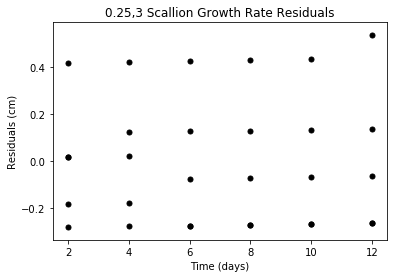

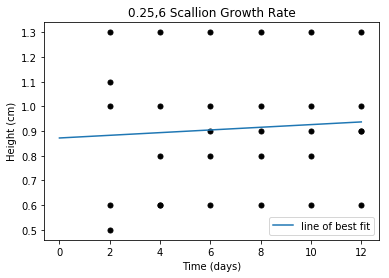

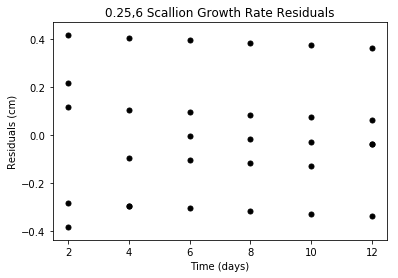

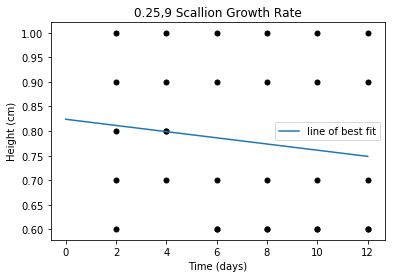

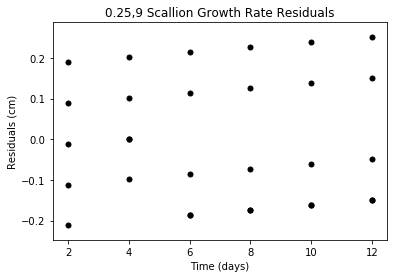

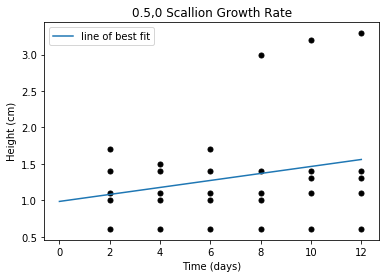

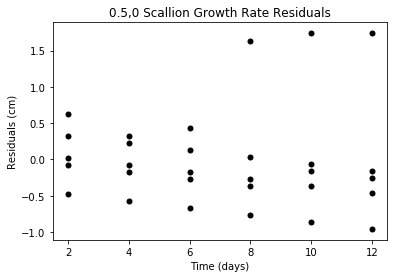

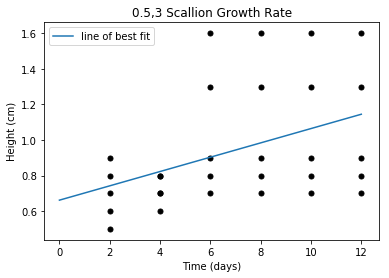

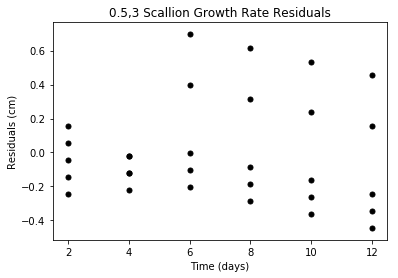

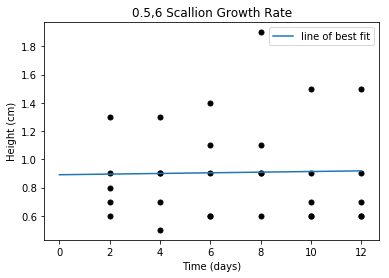

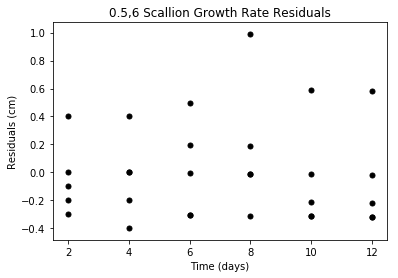

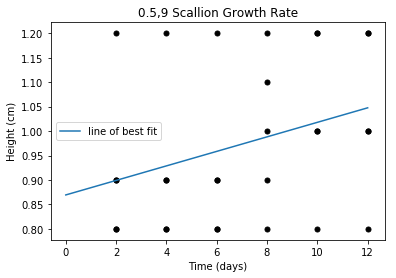

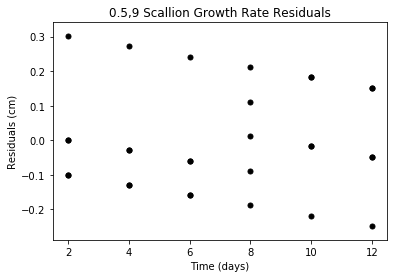

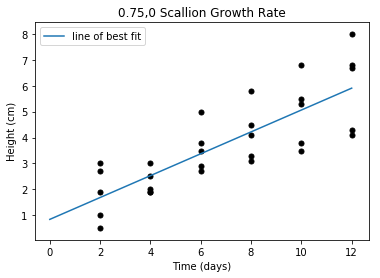

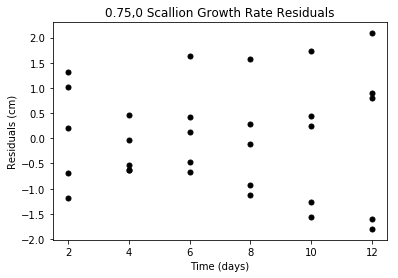

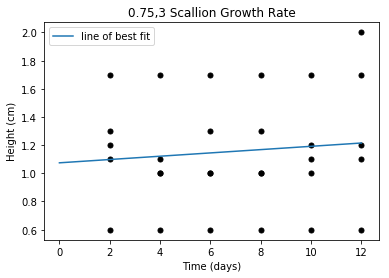

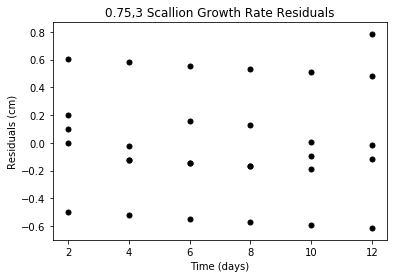

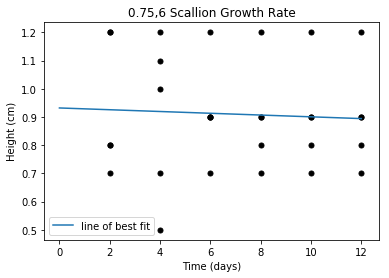

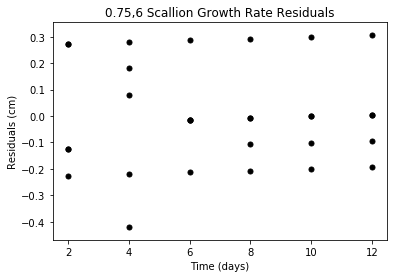

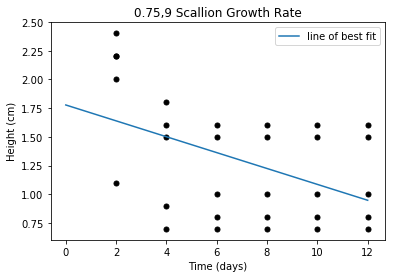

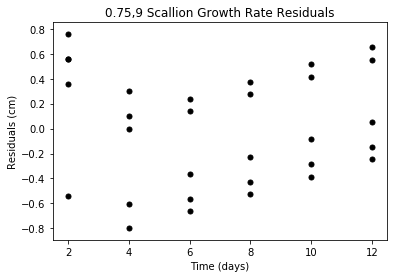

In [55]:
lin_reg_from_csv("ScallionData.csv", "Scallion")

# Garbanzo Bean Linear Regression
Growth rates for the garbanzo bean data are plotted below along with residuals.

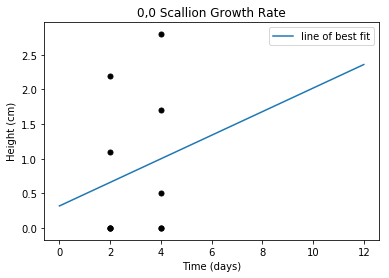

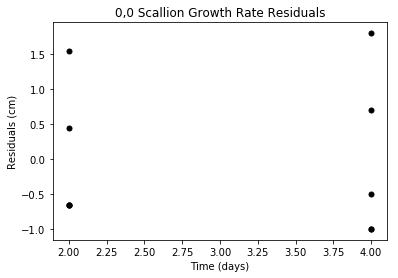

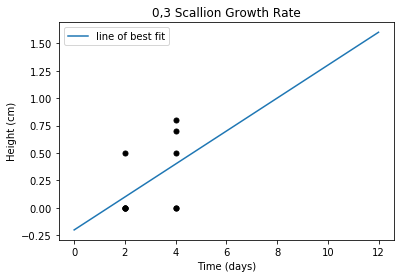

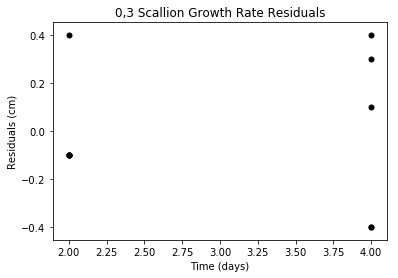

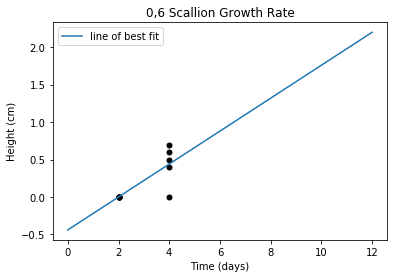

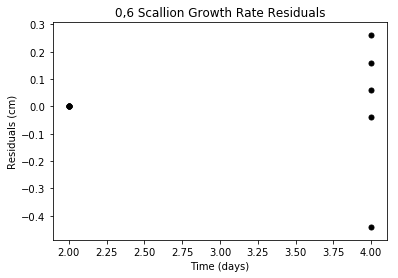

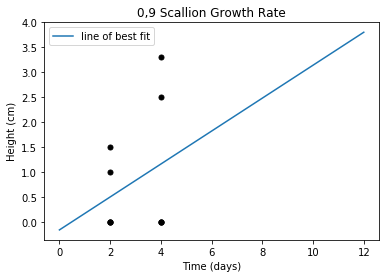

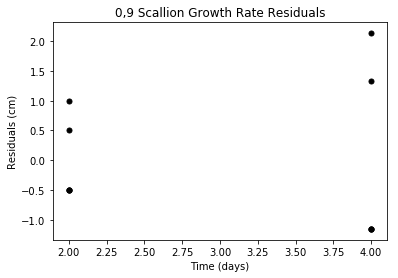

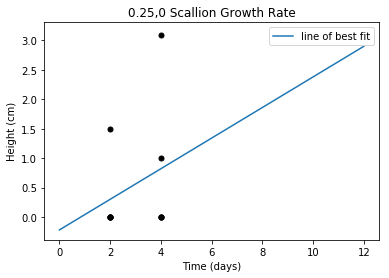

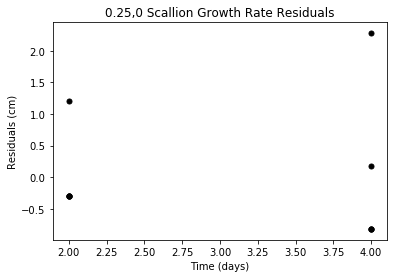

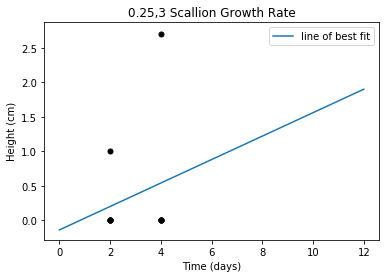

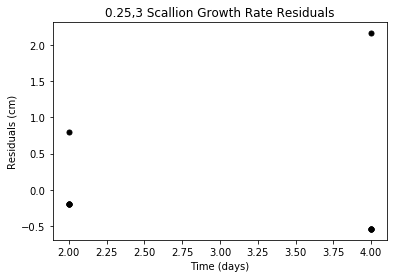

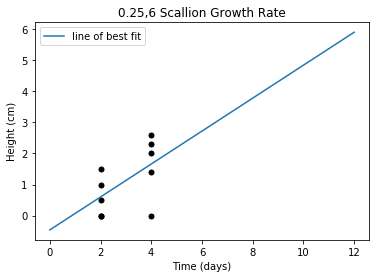

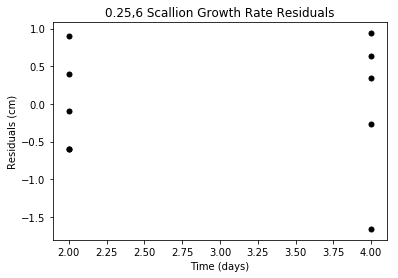

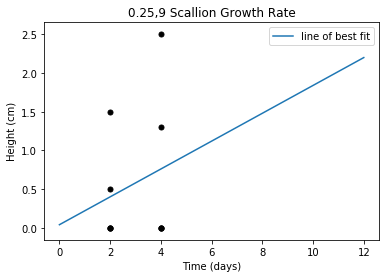

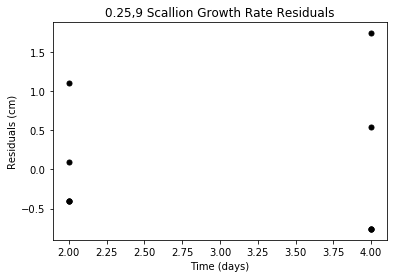

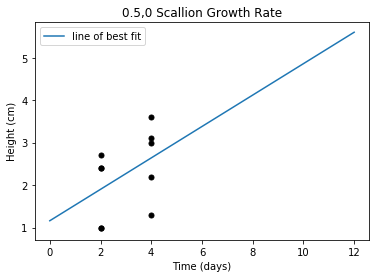

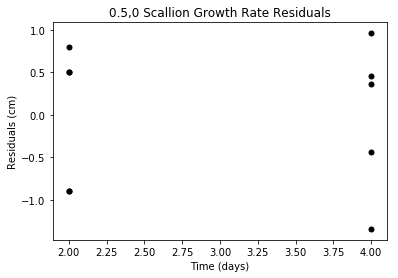

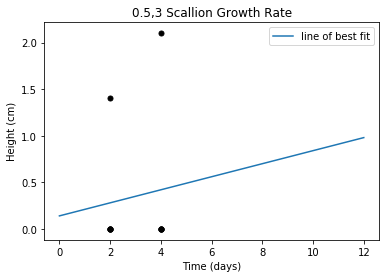

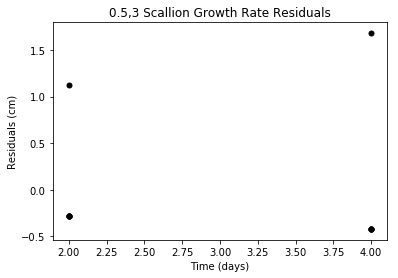

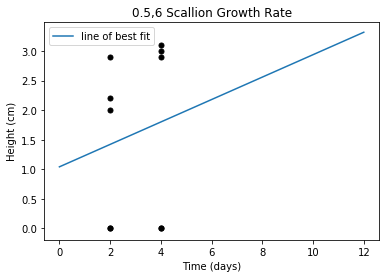

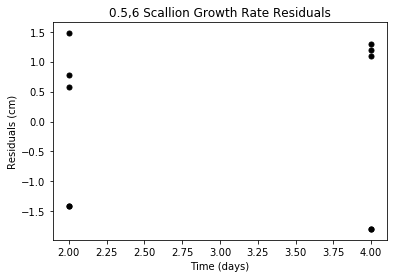

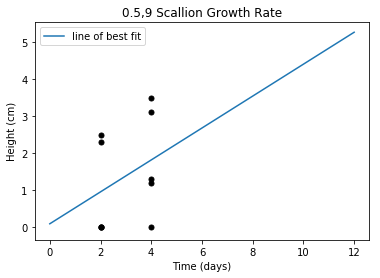

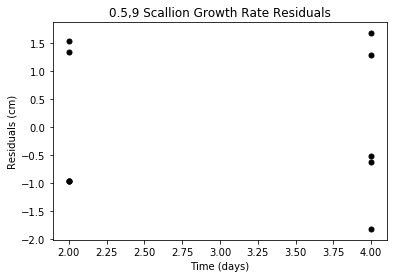

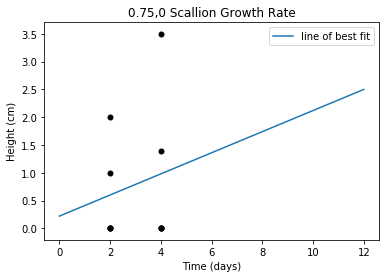

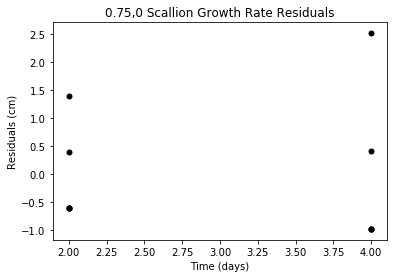

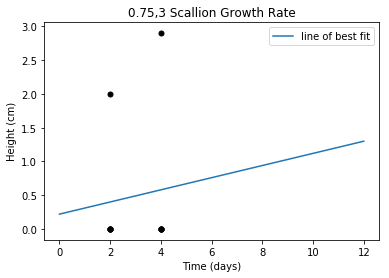

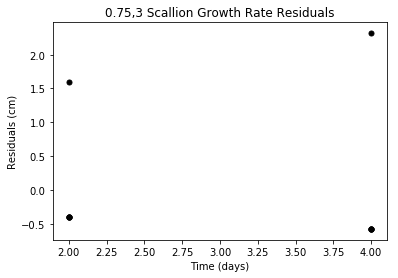

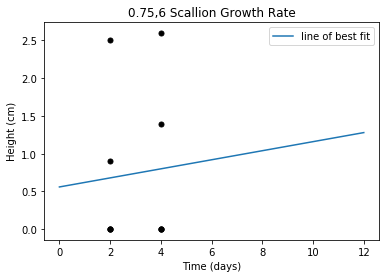

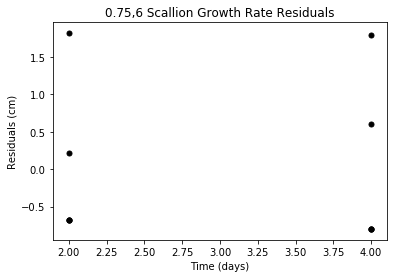

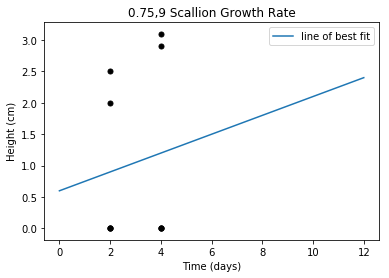

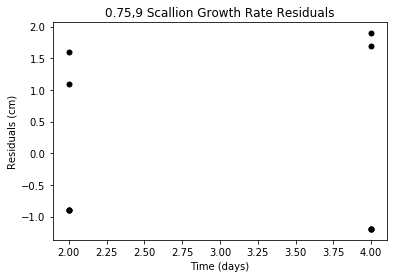

In [40]:
lin_reg_from_csv("GarbanzoData.csv", "Garbanzo")